<a href="https://colab.research.google.com/github/saranyapalani/project/blob/master/theft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
chicago_df = pd.read_csv('/content/drive/My Drive/sita.csv',error_bad_lines=False)

In [8]:
chicago_df.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05-03-2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10,24.0,29.0,08B,1154907.0,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3,20.0,42.0,08B,1183066.0,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15,37.0,25.0,24,1140789.0,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15,28.0,25.0,08B,1143223.0,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15,28.0,25.0,6,1139890.0,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


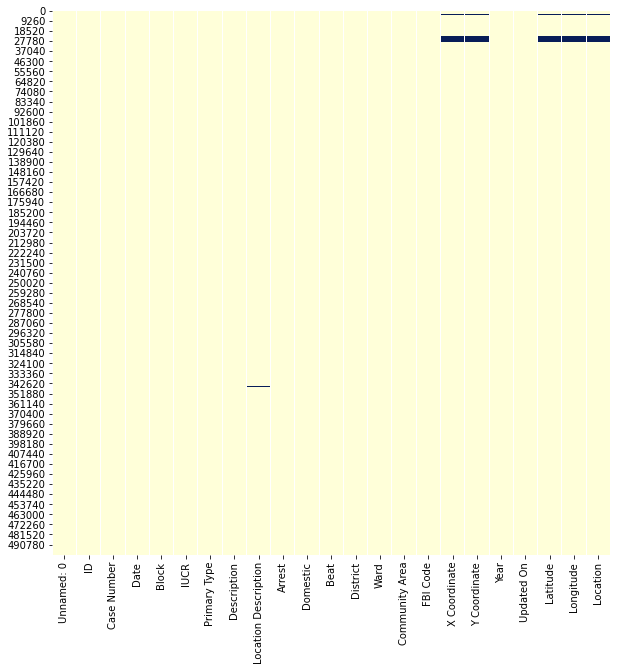

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')


In [11]:
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 
                 'X Coordinate', 'Y Coordinate','Updated On','Year', 
                 'FBI Code', 'Beat','Ward','Community Area', 'Location', 
                 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)


KeyError: ignored

In [12]:
chicago_df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,10508693,05-03-2016 23:40,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1,10508695,05-03-2016 21:40,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True
2,10508697,05-03-2016 23:31,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False
3,10508698,05-03-2016 22:10,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False
4,10508699,05-03-2016 22:00,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True


In [0]:
chicago_df['Date'] = pd.to_datetime(chicago_df['Date'].astype(str), errors='coerce')
chicago_df['Date'] = pd.to_datetime(chicago_df['Date'], format = '%d/%m/%Y %H:%M:%S')


In [21]:
chicago_df.head(5)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,10508693,2016-05-03 23:40:00,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1,10508695,2016-05-03 21:40:00,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True
2,10508697,2016-05-03 23:31:00,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False
3,10508698,2016-05-03 22:10:00,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False
4,10508699,2016-05-03 22:00:00,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True


In [0]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [23]:
chicago_df['Primary Type'].value_counts()

THEFT                                109717
BATTERY                               89025
NARCOTICS                             53952
CRIMINAL DAMAGE                       52571
BURGLARY                              31493
ASSAULT                               30364
OTHER OFFENSE                         28377
MOTOR VEHICLE THEFT                   23875
DECEPTIVE PRACTICE                    21939
ROBBERY                               19549
CRIMINAL TRESPASS                     12833
WEAPONS VIOLATION                      5889
PUBLIC PEACE VIOLATION                 4558
OFFENSE INVOLVING CHILDREN             3614
PROSTITUTION                           3250
CRIM SEXUAL ASSAULT                    2082
INTERFERENCE WITH PUBLIC OFFICER       1994
SEX OFFENSE                            1523
GAMBLING                                829
LIQUOR LAW VIOLATION                    813
ARSON                                   699
KIDNAPPING                              364
STALKING                        

In [24]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         109717
BATTERY                        89025
NARCOTICS                      53952
CRIMINAL DAMAGE                52571
BURGLARY                       31493
ASSAULT                        30364
OTHER OFFENSE                  28377
MOTOR VEHICLE THEFT            23875
DECEPTIVE PRACTICE             21939
ROBBERY                        19549
CRIMINAL TRESPASS              12833
WEAPONS VIOLATION               5889
PUBLIC PEACE VIOLATION          4558
OFFENSE INVOLVING CHILDREN      3614
PROSTITUTION                    3250
Name: Primary Type, dtype: int64

In [25]:
chicago_df['Primary Type'].value_counts().iloc[:15].index


Index(['THEFT', 'BATTERY', 'NARCOTICS', 'CRIMINAL DAMAGE', 'BURGLARY',
       'ASSAULT', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE',
       'ROBBERY', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION'],
      dtype='object')

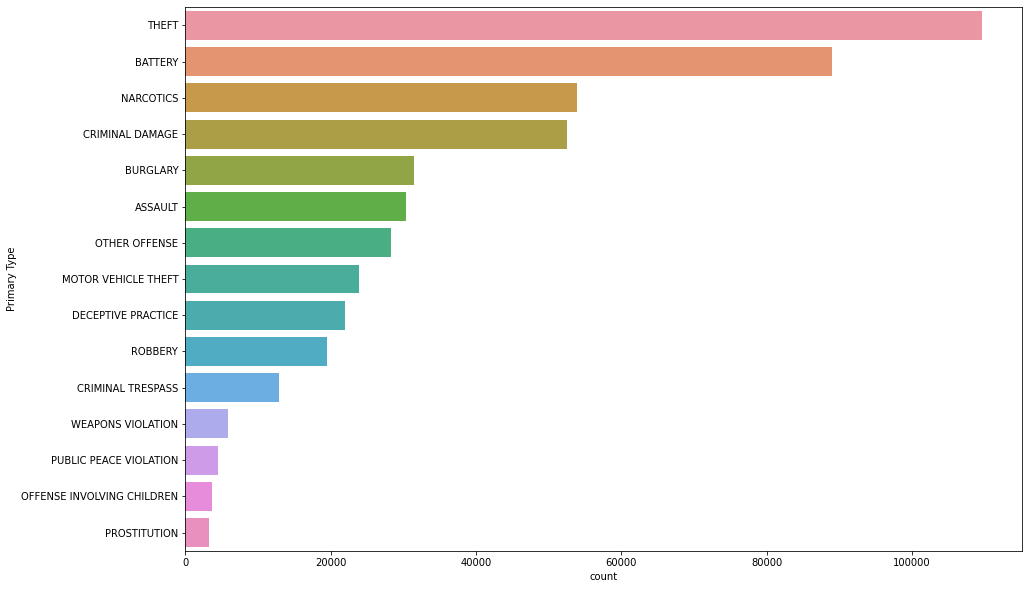

In [26]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = chicago_df, 
              order = chicago_df['Primary Type'].value_counts().iloc[:15].index)

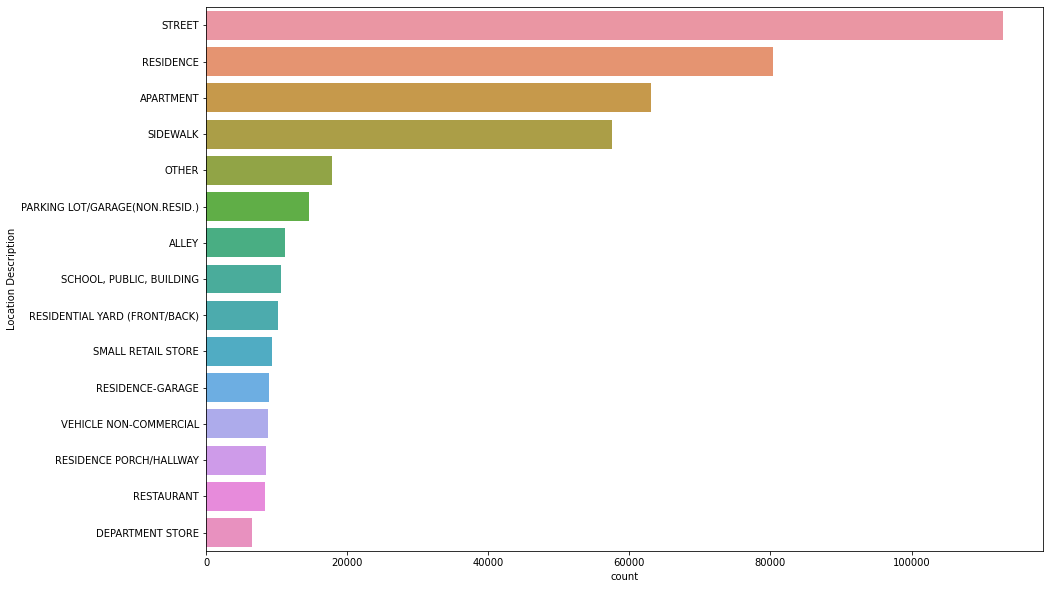

In [27]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, 
              order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [0]:
Groups = chicago_df.groupby(chicago_df['Primary Type'])
Groups = dict(list(Groups))


In [0]:
theft_data = [Groups['THEFT'], Groups['ROBBERY']]
theft_data = pd.concat(theft_data, axis = 0)
del Groups
del chicago_df

In [31]:
theft_data.head(5)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2016-05-03 22:00:00,10508699,2016-05-03 22:00:00,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True
2016-05-03 17:30:00,10508717,2016-05-03 17:30:00,011XX W JACKSON BLVD,THEFT,FROM BUILDING,OTHER,False,False
2016-05-03 09:00:00,10508724,2016-05-03 09:00:00,028XX S DR MARTIN LUTHER KING JR DR,THEFT,$500 AND UNDER,STREET,False,False
2016-05-03 22:08:00,10508728,2016-05-03 22:08:00,016XX N CLAREMONT AVE,THEFT,OVER $500,STREET,False,False
2016-05-03 21:45:00,10508738,2016-05-03 21:45:00,020XX W LE MOYNE ST,THEFT,OVER $500,STREET,False,False


In [32]:
theft_data.resample('Y').size()

Date
2014-12-31     1033
2015-12-31    11246
2016-12-31     5998
2017-12-31        0
2018-12-31    88204
2019-12-31    22577
dtype: int64

Text(0, 0.5, 'Number of Crimes')

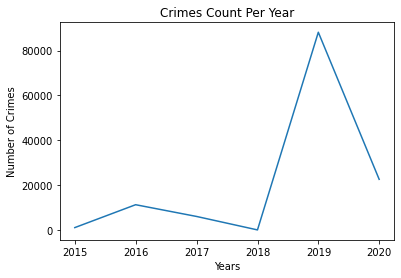

In [33]:
plt.plot(theft_data.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')


In [34]:
theft_data.resample('M').size().head(), theft_data.resample('M').size().tail()

(Date
 2014-01-31    13
 2014-02-28    11
 2014-03-31    20
 2014-04-30    64
 2014-05-31    92
 dtype: int64, Date
 2019-08-31     20
 2019-09-30     27
 2019-10-31     55
 2019-11-30     77
 2019-12-31    143
 dtype: int64)

Text(0, 0.5, 'Number of Crimes')

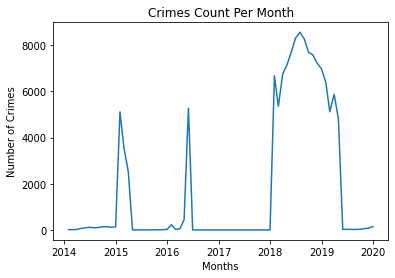

In [35]:
plt.plot(theft_data.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [36]:
theft_data.resample('Q').size().head(),theft_data.resample('Q').size().tail()

(Date
 2014-03-31       44
 2014-06-30      268
 2014-09-30      334
 2014-12-31      387
 2015-03-31    11191
 dtype: int64, Date
 2018-12-31    21773
 2019-03-31    17367
 2019-06-30     4867
 2019-09-30       68
 2019-12-31      275
 dtype: int64)

Text(0, 0.5, 'Number of Crimes')

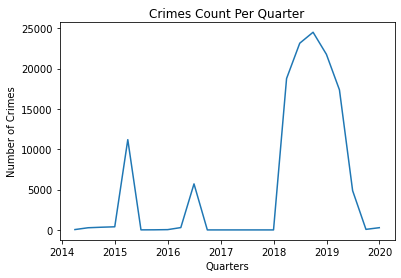

In [37]:
plt.plot(theft_data.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')


In [0]:
chicago_prophet = theft_data.resample('M').size().reset_index()

In [39]:
chicago_prophet.head(), chicago_prophet.tail()


(        Date   0
 0 2014-01-31  13
 1 2014-02-28  11
 2 2014-03-31  20
 3 2014-04-30  64
 4 2014-05-31  92,          Date    0
 67 2019-08-31   20
 68 2019-09-30   27
 69 2019-10-31   55
 70 2019-11-30   77
 71 2019-12-31  143)

In [0]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [41]:
chicago_prophet.head(), chicago_prophet.tail()

(        Date  Crime Count
 0 2014-01-31           13
 1 2014-02-28           11
 2 2014-03-31           20
 3 2014-04-30           64
 4 2014-05-31           92,          Date  Crime Count
 67 2019-08-31           20
 68 2019-09-30           27
 69 2019-10-31           55
 70 2019-11-30           77
 71 2019-12-31          143)

In [0]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)


In [43]:
chicago_prophet_df.head(),chicago_prophet_df.tail()

(        Date  Crime Count
 0 2014-01-31           13
 1 2014-02-28           11
 2 2014-03-31           20
 3 2014-04-30           64
 4 2014-05-31           92,          Date  Crime Count
 67 2019-08-31           20
 68 2019-09-30           27
 69 2019-10-31           55
 70 2019-11-30           77
 71 2019-12-31          143)

In [44]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [0]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})


In [46]:
chicago_prophet_df_final.head(), chicago_prophet_df_final.tail()

(          ds   y
 0 2014-01-31  13
 1 2014-02-28  11
 2 2014-03-31  20
 3 2014-04-30  64
 4 2014-05-31  92,            ds    y
 67 2019-08-31   20
 68 2019-09-30   27
 69 2019-10-31   55
 70 2019-11-30   77
 71 2019-12-31  143)

In [47]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [49]:
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-31,-1007.053533,-2143.419289,4247.431272,-1007.053533,-1007.053533,2318.650807,2318.650807,2318.650807,2318.650807,2318.650807,2318.650807,0.0,0.0,0.0,1311.597274
1,2014-02-28,-946.656872,-2725.823247,3705.141265,-946.656872,-946.656872,1403.344586,1403.344586,1403.344586,1403.344586,1403.344586,1403.344586,0.0,0.0,0.0,456.687714
2,2014-03-31,-879.789140,-2586.589871,3752.118091,-879.789140,-879.789140,1570.632834,1570.632834,1570.632834,1570.632834,1570.632834,1570.632834,0.0,0.0,0.0,690.843694
3,2014-04-30,-815.078431,-3081.106610,3317.690256,-815.078431,-815.078431,984.615563,984.615563,984.615563,984.615563,984.615563,984.615563,0.0,0.0,0.0,169.537131
4,2014-05-31,-748.210699,-3152.292179,3078.335683,-748.210699,-748.210699,708.786303,708.786303,708.786303,708.786303,708.786303,708.786303,0.0,0.0,0.0,-39.424397


In [50]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
432,2020-12-26,4430.803038,-6506.366750,-318.154319,4430.803010,4430.803068,-7999.396672,-7999.396672,-7999.396672,-7999.396672,-7999.396672,-7999.396672,0.0,0.0,0.0,-3568.593635
433,2020-12-27,4432.960061,-5501.540622,1104.949223,4432.960034,4432.960092,-6565.387483,-6565.387483,-6565.387483,-6565.387483,-6565.387483,-6565.387483,0.0,0.0,0.0,-2132.427421
434,2020-12-28,4435.117085,-3730.206487,2844.562030,4435.117057,4435.117116,-4970.342084,-4970.342084,-4970.342084,-4970.342084,-4970.342084,-4970.342084,0.0,0.0,0.0,-535.224999
435,2020-12-29,4437.274109,-1985.006631,4417.889308,4437.274081,4437.274140,-3253.397719,-3253.397719,-3253.397719,-3253.397719,-3253.397719,-3253.397719,0.0,0.0,0.0,1183.876390
436,2020-12-30,4439.431132,-171.544230,6225.436873,4439.431105,4439.431163,-1457.701076,-1457.701076,-1457.701076,-1457.701076,-1457.701076,-1457.701076,0.0,0.0,0.0,2981.730056


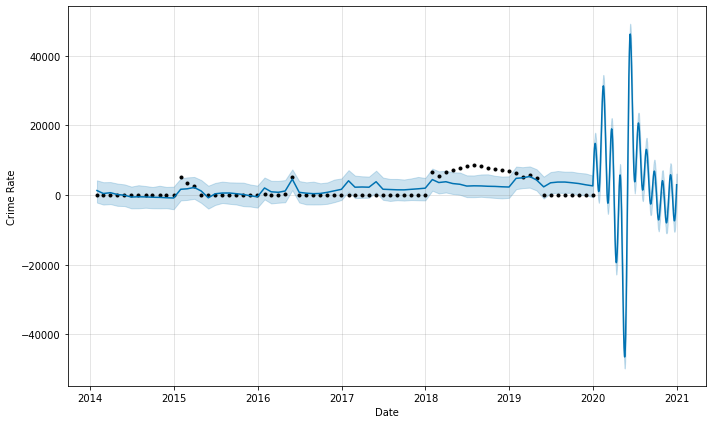

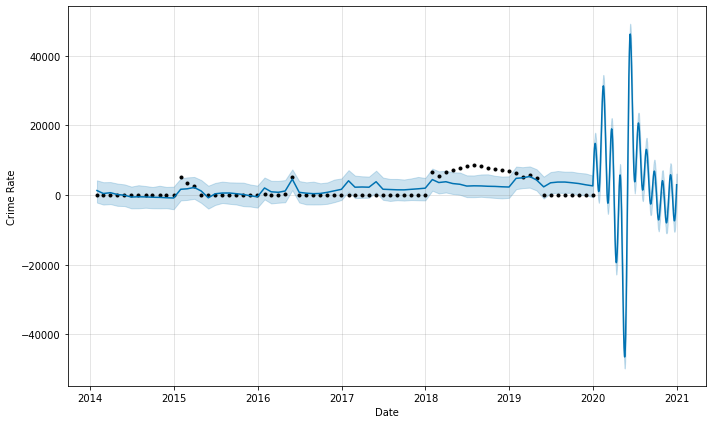

In [51]:
m.plot(forecast, xlabel='Date', ylabel='Crime Rate')


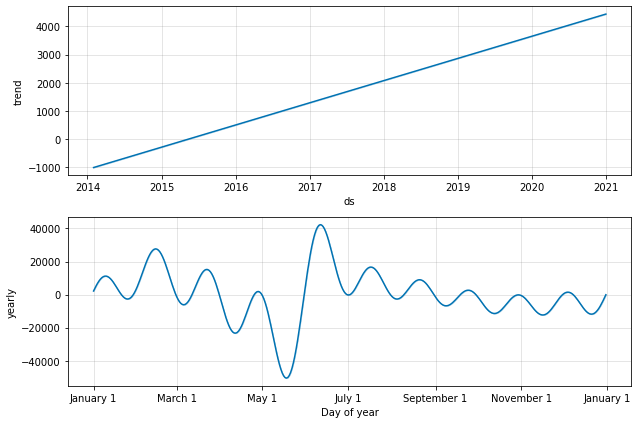

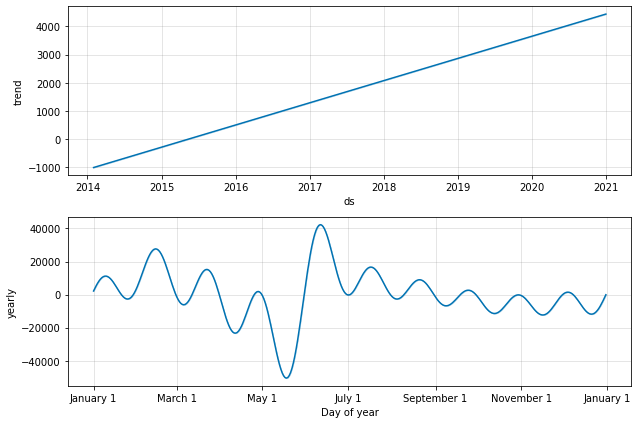

In [52]:
m.plot_components(forecast)
